# Session 2-- Download and Graph

## Module 3: Download & Graph intro

## A. Import libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

## B. Import data

### B.1.1 Import from github

### Click on the raw button then copy the url

<img src="Screenshots/Github.png" />



In [2]:
url = 'https://raw.githubusercontent.com/nytimes/covid-19-data/master/excess-deaths/deaths.csv'
df = pd.read_csv(url)
df.head(3)

,country,placename,frequency,start_date,end_date,year,month,week,deaths,expected_deaths,excess_deaths,baseline
0,Austria,NaN,weekly,2020-01-06,2020-01-12,2020,1,2.0,1702,1806.0,-104.0,2015-2019 historical data
1,Austria,NaN,weekly,2020-01-13,2020-01-19,2020,1,3.0,1797,1819.0,-22.0,2015-2019 historical data
2,Austria,NaN,weekly,2020-01-20,2020-01-26,2020,1,4.0,1779,1831.0,-52.0,2015-2019 historical data


# 1. Graphing

## 1.A Select only Austria

In [6]:
df.country.unique()

array(['Austria', 'Belgium', 'Bolivia', 'Brazil', 'Chile', 'Colombia',
       'Czech Republic', 'Denmark', 'Ecuador', 'Finland', 'France',
       'Germany', 'Hungary', 'Ireland', 'Israel', 'Turkey', 'Italy',
       'Indonesia', 'Mexico', 'Russia', 'India', 'Netherlands', 'Norway',
       'Peru', 'Poland', 'Portugal', 'South Africa', 'South Korea',
       'Spain', 'Sweden', 'Switzerland', 'Thailand', 'Japan',
       'United Kingdom', 'United States'], dtype=object)

In [7]:
mask = df.country=='Austria'
df_a = df.loc[mask, :]
df_a.head(3)

,country,placename,frequency,start_date,end_date,year,month,week,deaths,expected_deaths,excess_deaths,baseline
0,Austria,NaN,weekly,2020-01-06,2020-01-12,2020,1,2.0,1702,1806.0,-104.0,2015-2019 historical data
1,Austria,NaN,weekly,2020-01-13,2020-01-19,2020,1,3.0,1797,1819.0,-22.0,2015-2019 historical data
2,Austria,NaN,weekly,2020-01-20,2020-01-26,2020,1,4.0,1779,1831.0,-52.0,2015-2019 historical data


## 1.B Select only certain columns

In [8]:
df_a = df_a.loc[:, ['start_date','excess_deaths']]
df_a.head(2)

,start_date,excess_deaths
0,2020-01-06,-104.0
1,2020-01-13,-22.0


## 1.1 Set index

### 1.1.A Quick explainer on indexing

In [10]:
df_a.index[:3]

Int64Index([0, 1, 2, 3, 4], dtype='int64')

### 1.1.1 Convert index

In [11]:
df_a = df_a.set_index('start_date')
df_a.head(2)

,excess_deaths
start_date,
2020-01-06,-104.0
2020-01-13,-22.0


In [13]:
df_a.index[:3]

Index(['2020-01-06', '2020-01-13', '2020-01-20'], dtype='object', name='start_date')

## 1.2 Line plot

<AxesSubplot:xlabel='start_date'>

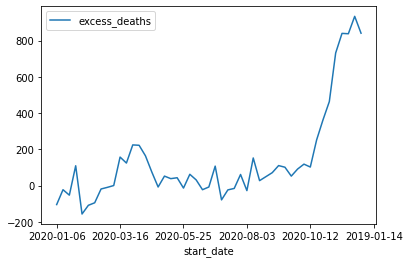

In [14]:
df_a.plot()

# 2. Plot multiple countries

## 2.A Select two countries

In [24]:
df.country.unique()

array(['Austria', 'Belgium', 'Bolivia', 'Brazil', 'Chile', 'Colombia',
       'Czech Republic', 'Denmark', 'Ecuador', 'Finland', 'France',
       'Germany', 'Hungary', 'Ireland', 'Israel', 'Turkey', 'Italy',
       'Indonesia', 'Mexico', 'Russia', 'India', 'Netherlands', 'Norway',
       'Peru', 'Poland', 'Portugal', 'South Africa', 'South Korea',
       'Spain', 'Sweden', 'Switzerland', 'Thailand', 'Japan',
       'United Kingdom', 'United States'], dtype=object)

In [45]:
countries = ['France','Finland']
mask = df.country.isin(countries)
df_sub = df.loc[mask, ['start_date','country','excess_deaths']]
df_sub.head(2)

,start_date,country,excess_deaths
2009,2020-01-06,Finland,-87.0
2010,2020-01-13,Finland,-71.0


### 2.A.1 Show unique countries

In [46]:
df_sub.country.unique()

array(['Finland', 'France'], dtype=object)

## 2.1 Pivot table

In [49]:
df_sub = df_sub.pivot_table(
    columns='country', 
    index='start_date', 
    values='excess_deaths')
df_sub.head(3)

country,Finland,France
start_date,,
2020-01-06,-87.0,-271.0
2020-01-13,-71.0,-857.0
2020-01-20,-73.0,-1090.0


In [51]:
df_sub.index[:3]

Index(['2020-01-06', '2020-01-13', '2020-01-20'], dtype='object', name='start_date')

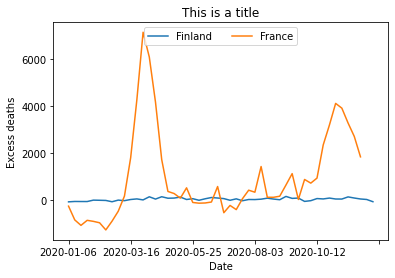

In [74]:
df_sub.plot()
plt.title('This is a title')
plt.xlabel('Date')
plt.ylabel('Excess deaths')
plt.legend(loc='upper center', ncol=2)

# 3. Bar chart

## 3.1 Subset data

In [54]:
df.start_date.unique()[:3]

array(['2020-01-06', '2020-01-13', '2020-01-20'], dtype=object)

In [57]:
mask = df.start_date=='2020-01-13'
df_bar = df.loc[mask, ['country','excess_deaths']]
df_bar.head(3)

,country,excess_deaths
1,Austria,-22.0
559,Belgium,-114.0
1015,Chile,72.0


## 3.2 set index

In [59]:
df_bar = df_bar.set_index('country')
df_bar.head(3)

,excess_deaths
country,
Austria,-22.0
Belgium,-114.0
Chile,72.0


### 3.2.1 Reset index

In [60]:
df_bar = df_bar.reset_index()
df_bar.index[:3]

RangeIndex(start=0, stop=3, step=1)

In [61]:
df_bar = df_bar.set_index('country')
df_bar.head(3)

,excess_deaths
country,
Austria,-22.0
Belgium,-114.0
Chile,72.0


## 3.3 Plot

Text(0, 0.5, 'Excess deaths')

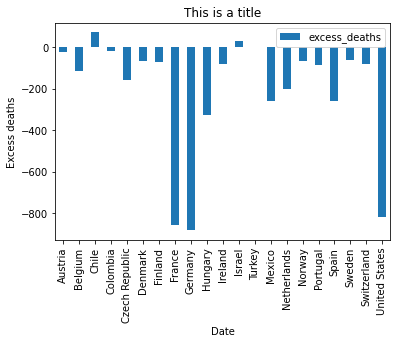

In [64]:
df_bar.plot(kind='bar')
plt.title('This is a title')
plt.xlabel('Country')
plt.ylabel('Excess deaths')

# 4. Resampling

## 4.1 Import data

In [83]:
url = 'https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-states.csv'
df_nyt = pd.read_csv(url, parse_dates=True, index_col='date')
df_nyt.head(3)

,state,fips,cases,deaths
date,,,,
2020-01-21,Washington,53,1,0
2020-01-22,Washington,53,1,0
2020-01-23,Washington,53,1,0


## 4.2 Drop columns

In [84]:
df_nyt_case = df_nyt.drop(['fips'], axis=1)
df_nyt_case.head(2)

,state,cases,deaths
date,,,
2020-01-21,Washington,1,0
2020-01-22,Washington,1,0


## 4.3 Reset index

In [85]:
df_nyt_case = df_nyt_case.reset_index()
df_nyt_case.head(2)

,date,state,cases,deaths
0,2020-01-21,Washington,1,0
1,2020-01-22,Washington,1,0


## 4.4 Pivot table

In [87]:
df_nyt_case = df_nyt_case.pivot_table(index='date', 
                        columns='state', 
                        values='cases')
df_nyt_case.head(2)

state,Alabama,Alaska,American Samoa,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,District of Columbia,...,Tennessee,Texas,Utah,Vermont,Virgin Islands,Virginia,Washington,West Virginia,Wisconsin,Wyoming
date,,,,,,,,,,,,,,,,,,,,,
2020-01-21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
2020-01-22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN


## 4.5 Drop nas

In [89]:
df_nyt_case = df_nyt_case.dropna()
df_nyt_case.head(3)

state,Alabama,Alaska,American Samoa,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,District of Columbia,...,Tennessee,Texas,Utah,Vermont,Virgin Islands,Virginia,Washington,West Virginia,Wisconsin,Wyoming
date,,,,,,,,,,,,,,,,,,,,,
2021-09-22,778549.0,103795.0,1.0,1072863.0,488316.0,4677452.0,660023.0,386672.0,129231.0,59849.0,...,1172596.0,3972002.0,497521.0,32079.0,6557.0,843212.0,635636.0,227506.0,787194.0,86594.0
2021-09-23,781915.0,105110.0,1.0,1075876.0,489856.0,4687178.0,662451.0,387263.0,129874.0,60018.0,...,1176400.0,3982646.0,499120.0,32368.0,6557.0,846979.0,640094.0,228983.0,790787.0,87351.0
2021-09-24,784484.0,106888.0,1.0,1078874.0,491221.0,4694673.0,664010.0,387733.0,130444.0,60205.0,...,1181691.0,3999392.0,500792.0,32610.0,6557.0,849865.0,643183.0,231668.0,793981.0,87866.0


## 4.6 Resample by year

In [92]:
df_nyt_case = df_nyt_case.resample('A').sum()
df_nyt_case

state,Alabama,Alaska,American Samoa,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,District of Columbia,...,Tennessee,Texas,Utah,Vermont,Virgin Islands,Virginia,Washington,West Virginia,Wisconsin,Wyoming
date,,,,,,,,,,,,,,,,,,,,,
2021-12-31,84164032.0,14003883.0,101.0,122564066.0,52565636.0,504395829.0,78901295.0,42282863.0,15050525.0,6779376.0,...,127861110.0,430672634.0,57332107.0,4570129.0,739746.0,95643036.0,75118838.0,28298051.0,93989524.0,10562337.0
2022-12-31,31392824.0,5409630.0,30.0,48152385.0,20186466.0,207976847.0,33156444.0,18814968.0,6626182.0,3568576.0,...,47582370.0,163476079.0,22802848.0,2594747.0,388445.0,40486827.0,31995505.0,11557759.0,39679666.0,3858375.0


## 4.7 Transpose

In [100]:
df_nyt_case = df_nyt_case.transpose()
df_nyt_case.columns = ['2021', '2022']
df_nyt_case.head(2)

,2021,2022
state,,
Alabama,84164032.0,31392824.0
Alaska,14003883.0,5409630.0


## 4.8 Scatter

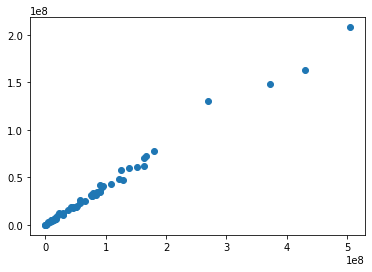

In [104]:
plt.scatter(x = '2021', 
            y = '2022', ,
            data = df_nyt_case)

# 5. Advanced 

In [105]:
url = 'https://www.atlantafed.org/-/media/documents/datafiles/chcs/wage-growth-tracker/wage-growth-data.xlsx'
wage = pd.read_excel(url, 
                     sheet_name='Average Wage Quartile', 
                     header=2, 
                     index_col=0,
                     usecols=[0,1,2,3,4]
                    )

wage = wage.replace('.','NaN')
wage.head(2)

,1st,2nd,3rd,4th
1997-01-01,NaN,NaN,NaN,NaN
1997-02-01,NaN,NaN,NaN,NaN


Text(0.5, 1.0, 'Wages for lowest earners (1st quartile) are rising faster than other groups')

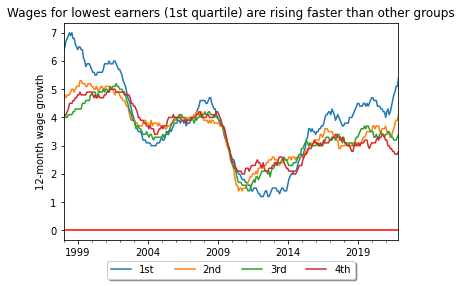

In [106]:
ax =wage['1998':].plot()
plt.legend(loc='lower center', bbox_to_anchor=(0.5, -0.2), ncol=4, shadow=True, fancybox=True)
plt.xlabel('')
plt.ylabel(r'12-month wage growth')
ax.axhline(0, color='red')

plt.title('Wages for lowest earners (1st quartile) are rising faster than other groups')
